# Modularity-Based Algorithms

### Loading data

In [2]:

!pip install pyecharts
!pip install pandas
!pip install python-louvain
!pip install matplotlib
!pip install geopandas==0.14.4
!pip install fiona==1.9.6
!pip install geodatasets
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: fiona
    Found existing installation: fiona 1.10.1
    Uninstalling fiona-1.10.1:
      Successfully uninstalled fiona-1.10.1


In [3]:
data_path = ''

In [4]:
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Load the datasets
airport_columns = [
    'Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO',
    'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
    'Tz Database Timezone', 'Type', 'Source'
]

route_columns = [
    'Airline', 'Airline ID', 'Source', 'Source ID', 'Destination',
    'Destination ID', 'Codeshare', 'Stops', 'Equipment'
]

def load_dataset(file_path, columns):
    return pd.read_csv(file_path, header=None, names=columns)

# Preprocess the data
def preprocess_graph(airports, routes):
    # Filter valid airports
    valid_airports = set(airports['Airport ID'].astype(str))

    # Build a graph
    G = nx.Graph()

    # Add nodes
    for _, row in airports.iterrows():
        G.add_node(row['Airport ID'], name=row['Name'], country=row['Country'],
                   latitude=row['Latitude'], longitude=row['Longitude'])

    # Add edges (routes)
    for _, row in routes.iterrows():
        if row['Source ID'] in valid_airports and row['Destination ID'] in valid_airports:
            G.add_edge(row['Source ID'], row['Destination ID'])

    return G



In [5]:
airports = pd.read_csv('cleaned_airports.csv')
routes = pd.read_csv('cleaned_routes.csv')
routes = pd.merge(airports[['IATA']],routes,left_on='IATA',right_on='Source')
routes = pd.merge(airports[['IATA']],routes,left_on='IATA',right_on='Destination')
# Visualize the data preview
display(airports.head())
display(routes.head())

# Direct graph creation with NetworkX
G = nx.Graph()

# Add nodes
for index, row in airports.iterrows():
    G.add_node(row['IATA'], name=row['Name'], city=row['City'], country=row['Country'],
                   latitude=row['Latitude'], longitude=row['Longitude'])

# Add edges
for index, row in routes.iterrows():
    G.add_edge(row['Source'], row['Destination'])

# Information on the Graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# Create the graph



,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz Database Timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


,IATA_x,IATA_y,Airline,Airline ID,Source,Source ID,Destination,Destination ID,Codeshare,Stops,Equipment
0,GKA,MAG,CG,1308,MAG,2,GKA,1,NaN,0,DH8
1,GKA,HGU,CG,1308,HGU,3,GKA,1,NaN,0,DH8 DHT
2,GKA,LAE,CG,1308,LAE,4,GKA,1,NaN,0,DH8
3,GKA,POM,CG,1308,POM,5,GKA,1,NaN,0,DH8
4,GKA,POM,PX,328,POM,5,GKA,1,NaN,0,DH4 DH8 DH3


Number of nodes: 6073
Number of edges: 18931


In [6]:
for node, attributes in G.nodes(data=True):
        print(f"Node: {node}, Attributes: {attributes}")


Streaming output truncated to the last 5000 lines.
Node: EDM, Attributes: {'name': 'La Roche-sur-Yon Airport', 'city': 'La Roche-sur-yon', 'country': 'France', 'latitude': 46.70190048217773, 'longitude': -1.3786300420761108}
Node: LDV, Attributes: {'name': 'Landivisiau Air Base', 'city': 'Landivisiau', 'country': 'France', 'latitude': 48.53030014038086, 'longitude': -4.151639938354492}
Node: CFR, Attributes: {'name': 'Caen-Carpiquet Airport', 'city': 'Caen', 'country': 'France', 'latitude': 49.173301696777344, 'longitude': -0.449999988079071}
Node: LME, Attributes: {'name': 'Le Mans-Arnage Airport', 'city': 'Le Mans', 'country': 'France', 'latitude': 47.94860076904297, 'longitude': 0.2016669958829879}
Node: RNS, Attributes: {'name': 'Rennes-Saint-Jacques Airport', 'city': 'Rennes', 'country': 'France', 'latitude': 48.0694999695, 'longitude': -1.73478996754}
Node: LAI, Attributes: {'name': 'Lannion-Côte de Granit Airport', 'city': 'Lannion', 'country': 'France', 'latitude': 48.754398, '

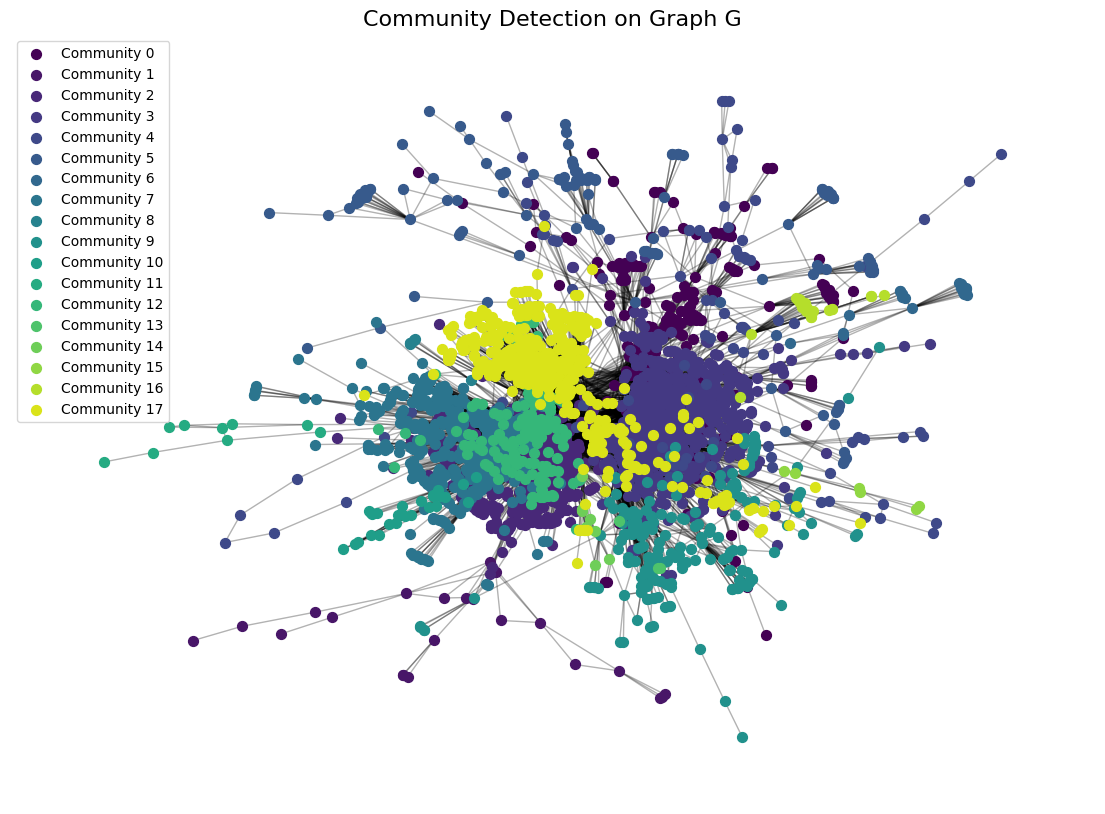

In [7]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Ensure the graph is connected
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()

# Apply Louvain algorithm
partition = community_louvain.best_partition(G)

# Assign community labels to nodes
nx.set_node_attributes(G, partition, "community")

# Visualize Communities on Spring Layout
def visualize_communities(graph, partition, title="Community Detection"):
    pos = nx.spring_layout(graph, seed=42)  # Spring layout for visualization
    cmap = plt.get_cmap('viridis')  # Color map for communities
    communities = set(partition.values())  # Get unique community IDs

    plt.figure(figsize=(14, 10))
    for community in communities:
        nodes = [node for node in graph.nodes if partition[node] == community]
        nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_size=50,
                               node_color=[cmap(community / len(communities))],
                               label=f"Community {community}")
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.legend(loc="best")
    plt.show()

visualize_communities(G, partition, title="Community Detection on Graph G")


In [30]:
graph_data = []
for node, attributes in G.nodes(data=True):
    attributes['Node'] = node
    graph_data.append(attributes)

<ipython-input-31-a01c77d40664>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_communities))  # Use a colormap with enough unique colors


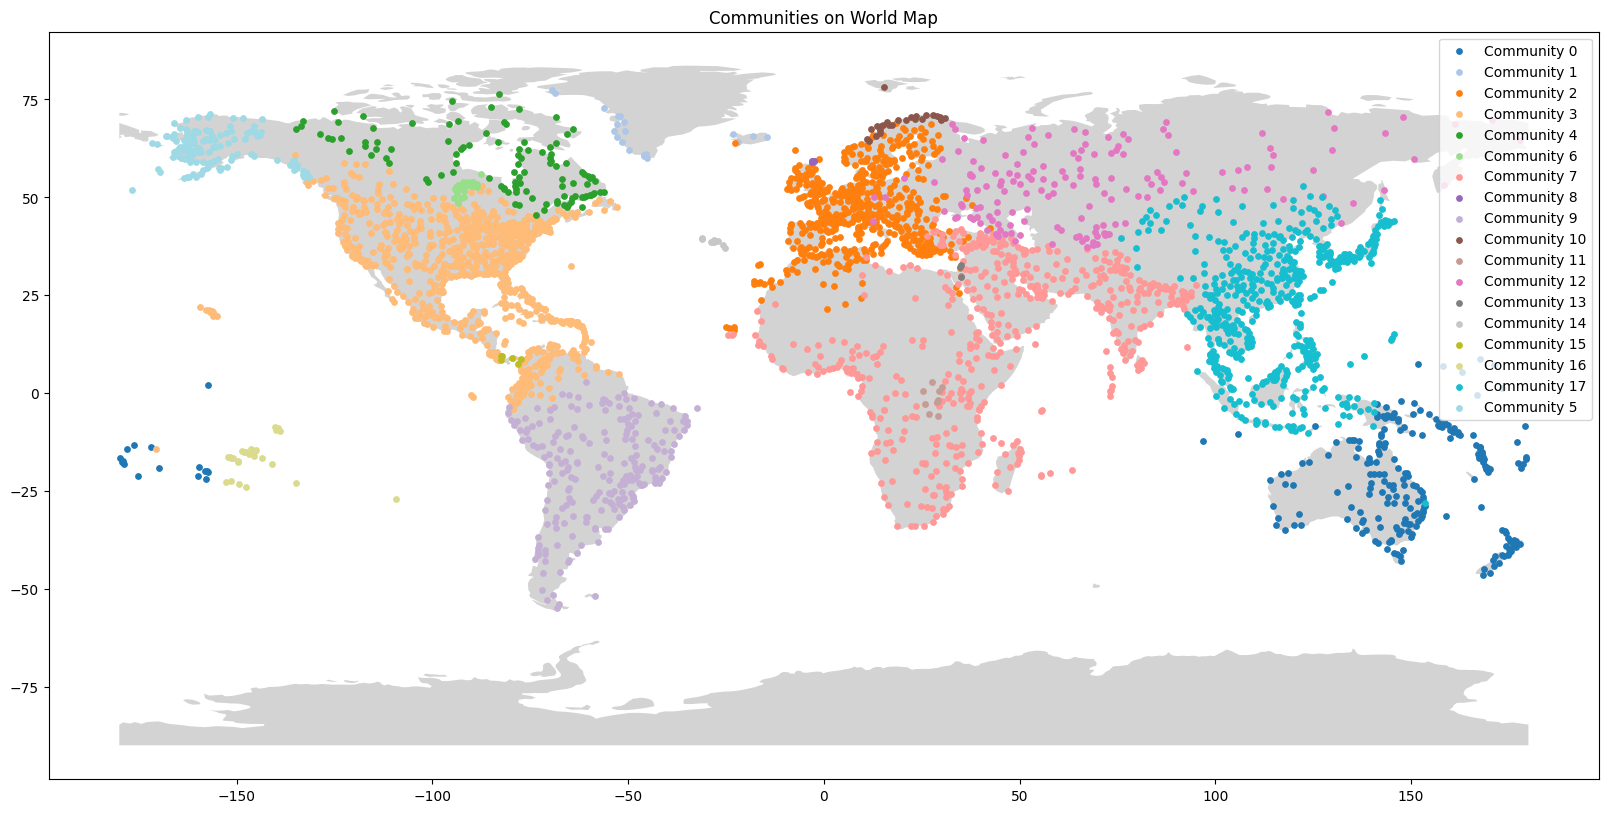

In [31]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt

df = pd.DataFrame(graph_data)
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load world map
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Generate unique colors for each community
unique_communities = gdf['community'].unique()
color_map = plt.cm.get_cmap('tab20', len(unique_communities))  # Use a colormap with enough unique colors
community_colors = {community: color_map(i) for i, community in enumerate(unique_communities)}

# Plot the map
fig, ax = plt.subplots(figsize=(20, 12))
world.plot(ax=ax, color='lightgray')  # Plot world map in the background

# Plot each community with a unique color
for community, color in community_colors.items():
    subset = gdf[gdf['community'] == community]
    subset.plot(ax=ax, marker='o', color=color, markersize=15, label=f"Community {community}")

# Add legend and show plot
plt.legend()
plt.title("Communities on World Map")
plt.show()


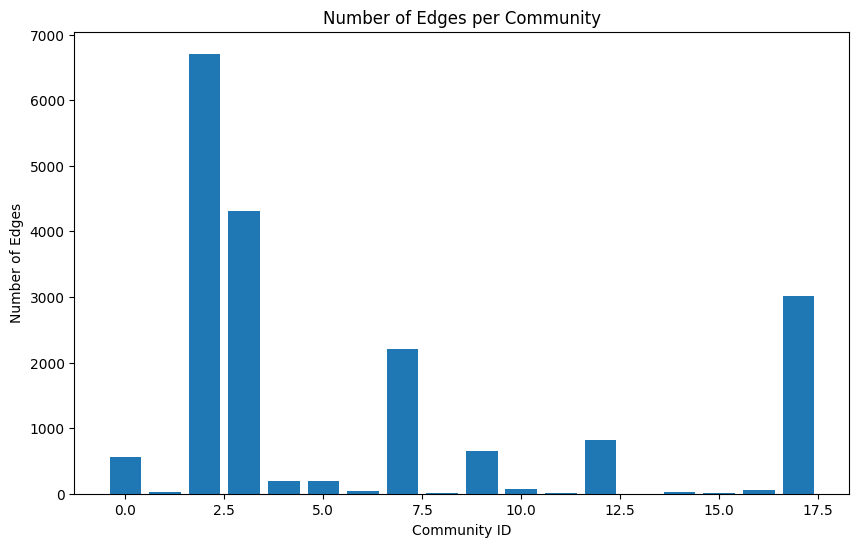

Community 0: 558 edges
Community 1: 32 edges
Community 2: 6707 edges
Community 3: 4315 edges
Community 4: 188 edges
Community 6: 47 edges
Community 7: 2204 edges
Community 8: 16 edges
Community 9: 644 edges
Community 10: 72 edges
Community 11: 10 edges
Community 12: 820 edges
Community 13: 3 edges
Community 14: 23 edges
Community 15: 8 edges
Community 16: 53 edges
Community 17: 3010 edges
Community 5: 196 edges


In [14]:
#how many edges does have each community of Graph G plot them

# Calculate and plot the number of edges per community
community_edges = {}
for u, v in G.edges():
    community = partition[u]
    community_edges[community] = community_edges.get(community, 0) + 1

plt.figure(figsize=(10, 6))
plt.bar(community_edges.keys(), community_edges.values())
plt.xlabel("Community ID")
plt.ylabel("Number of Edges")
plt.title("Number of Edges per Community")
plt.show()

# Print the number of edges per community in a more readable format
for community, num_edges in community_edges.items():
    print(f"Community {community}: {num_edges} edges")

In [15]:
# how many countries does have each community graph G
community_country_counts = df.groupby('community')['country'].nunique()

community_country_counts

,country
community,
0,21
1,2
2,52
3,43
4,1
5,1
6,1
7,77
8,1


In [ ]:
from scipy.spatial import ConvexHull
import numpy as np

def get_community_center(community_df):
    """Calculates the geometric center of a community.
    Args:
        community_df: DataFrame containing nodes belonging to a specific community.
    Returns:
        A tuple (longitude, latitude) representing the community center.
    """
    points = np.array(community_df[['longitude', 'latitude']])
    hull = ConvexHull(points)
    center_longitude = np.mean(points[hull.vertices, 0])
    center_latitude = np.mean(points[hull.vertices, 1])
    return center_longitude, center_latitude

# Calculate center for each community
community_centers = {}
for community in df['community'].unique():
  community_df = df[df['community'] == community]
  center_lon, center_lat = get_community_center(community_df)
  community_centers[community] = (center_lon, center_lat)

# Print the results
for community, center in community_centers.items():
  print(f"Community {community} center (Geometric Center): Longitude={center[0]}, Latitude={center[1]}")

# Example of using other centrality measures (Degree Centrality)
degree_centrality = nx.degree_centrality(G)
for community in df['community'].unique():
  community_nodes = df[df['community'] == community].Node.tolist()

  max_degree_centrality = 0
  central_node = None
  for node in community_nodes:

    if degree_centrality[node] > max_degree_centrality:
      max_degree_centrality = degree_centrality[node]
      central_node = node


  if central_node:
    central_node_data = df[df.Node==central_node]
    print(f"Community {community} center (Degree Centrality): {central_node_data['name']} (Longitude={central_node_data['longitude']}, Latitude={central_node_data['latitude']})")


# You can similarly calculate and print other centrality measures such as
# Betweenness centrality, Closeness centrality, Eigenvector centrality etc.
# Remember to replace degree_centrality with the calculated centrality measure.

In [36]:
# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

for community in df['community'].unique():
    community_nodes = df[df['community'] == community].Node.tolist()
    max_betweenness_centrality = 0
    central_node = None
    for node in community_nodes:
        if betweenness_centrality[node] > max_betweenness_centrality:
            max_betweenness_centrality = betweenness_centrality[node]
            central_node = node

    if central_node:
        central_node_data = df[df.Node == central_node]
        print(f"Community {community} center (Betweenness Centrality): {central_node_data['name'].iloc[0]} (Longitude={central_node_data['longitude'].iloc[0]}, Latitude={central_node_data['latitude'].iloc[0]})")


# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

for community in df['community'].unique():
    community_nodes = df[df['community'] == community].Node.tolist()
    max_closeness_centrality = 0
    central_node = None
    for node in community_nodes:
        if closeness_centrality[node] > max_closeness_centrality:
            max_closeness_centrality = closeness_centrality[node]
            central_node = node

    if central_node:
        central_node_data = df[df.Node == central_node]
        print(f"Community {community} center (Closeness Centrality): {central_node_data['name'].iloc[0]} (Longitude={central_node_data['longitude'].iloc[0]}, Latitude={central_node_data['latitude'].iloc[0]})")


# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

for community in df['community'].unique():
    community_nodes = df[df['community'] == community].Node.tolist()
    max_eigenvector_centrality = 0
    central_node = None
    for node in community_nodes:
        if eigenvector_centrality[node] > max_eigenvector_centrality:
            max_eigenvector_centrality = eigenvector_centrality[node]
            central_node = node

    if central_node:
        central_node_data = df[df.Node == central_node]
        print(f"Community {community} center (Eigenvector Centrality): {central_node_data['name'].iloc[0]} (Longitude={central_node_data['longitude'].iloc[0]}, Latitude={central_node_data['latitude'].iloc[0]})")

# Calculate PageRank
pagerank = nx.pagerank(G)

for community in df['community'].unique():
    community_nodes = df[df['community'] == community].Node.tolist()
    max_pagerank = 0
    central_node = None
    for node in community_nodes:
        if pagerank[node] > max_pagerank:
            max_pagerank = pagerank[node]
            central_node = node

    if central_node:
        central_node_data = df[df.Node == central_node]
        print(f"Community {community} center (PageRank): {central_node_data['name'].iloc[0]} (Longitude={central_node_data['longitude'].iloc[0]}, Latitude={central_node_data['latitude'].iloc[0]})")

Community 0 center (Betweenness Centrality): Sydney Kingsford Smith International Airport (Longitude=151.177001953125, Latitude=-33.94609832763672)
Community 1 center (Betweenness Centrality): Kangerlussuaq Airport (Longitude=-50.7116031647, Latitude=67.0122218992)
Community 2 center (Betweenness Centrality): Charles de Gaulle International Airport (Longitude=2.55, Latitude=49.012798)
Community 3 center (Betweenness Centrality): Los Angeles International Airport (Longitude=-118.4079971, Latitude=33.94250107)
Community 4 center (Betweenness Centrality): Yellowknife Airport (Longitude=-114.44000244140624, Latitude=62.462799072265625)
Community 6 center (Betweenness Centrality): Sioux Lookout Airport (Longitude=-91.9052963256836, Latitude=50.11389923095703)
Community 7 center (Betweenness Centrality): Dubai International Airport (Longitude=55.3643989563, Latitude=25.2527999878)
Community 8 center (Betweenness Centrality): Kirkwall Airport (Longitude=-2.9049999713897705, Latitude=58.957801

In [56]:
import matplotlib.colors as mcolors

def darken_color(color, factor=0.8):
  """Darkens a color by a given factor.

  Args:
    color: A tuple representing the RGBA color (e.g., (0.6, 0.8, 0.9, 1.0)).
    factor: The factor to darken the color by (0.0 to 1.0).

  Returns:
    A tuple representing the darkened RGBA color.
  """
  r, g, b, a = color
  return (r * factor, g * factor, b * factor, a)



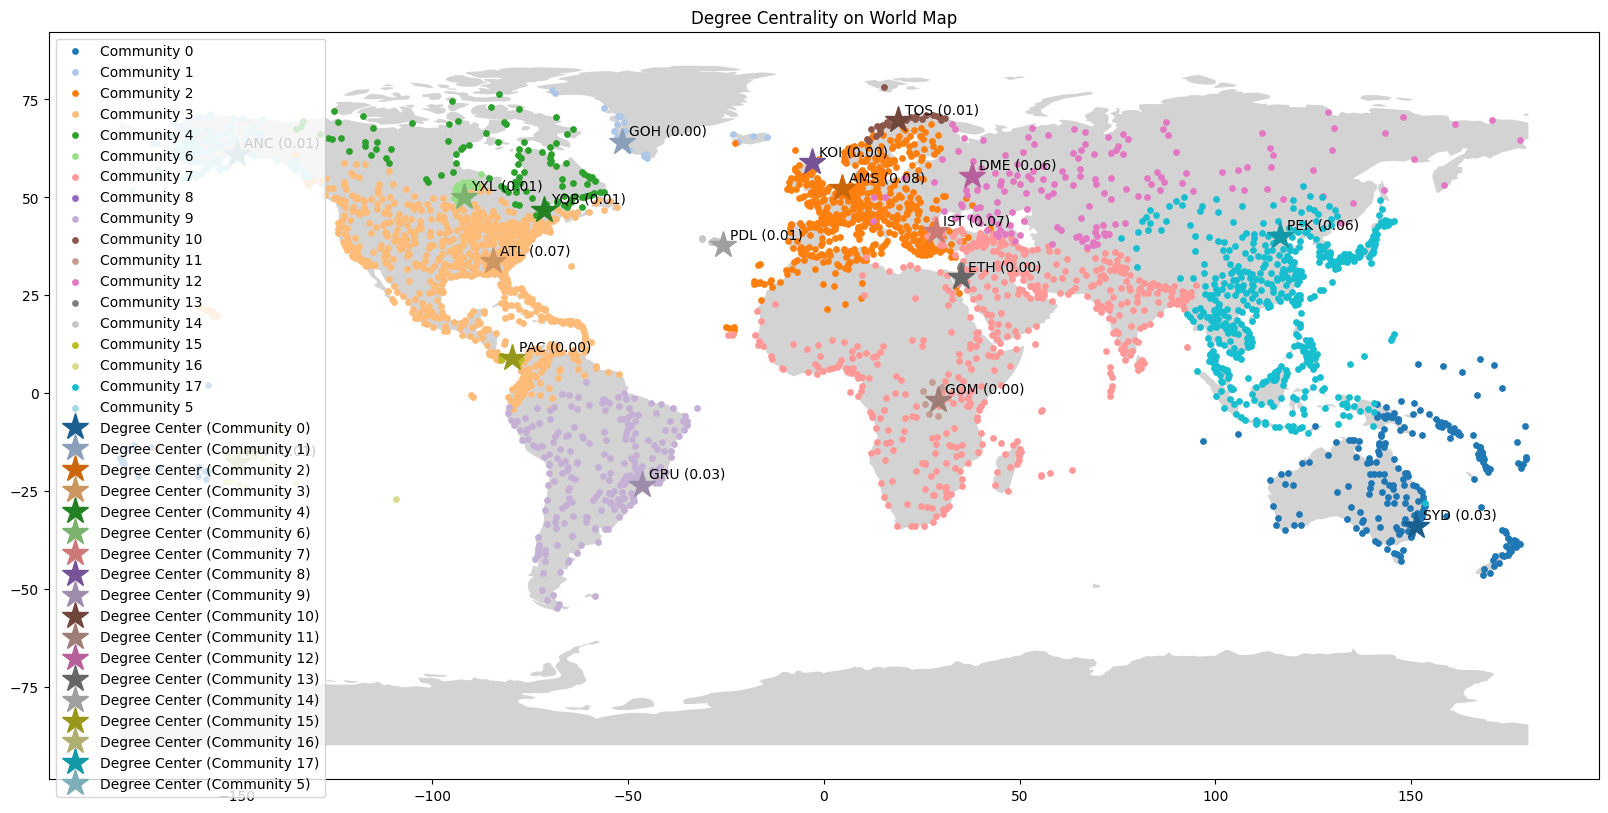

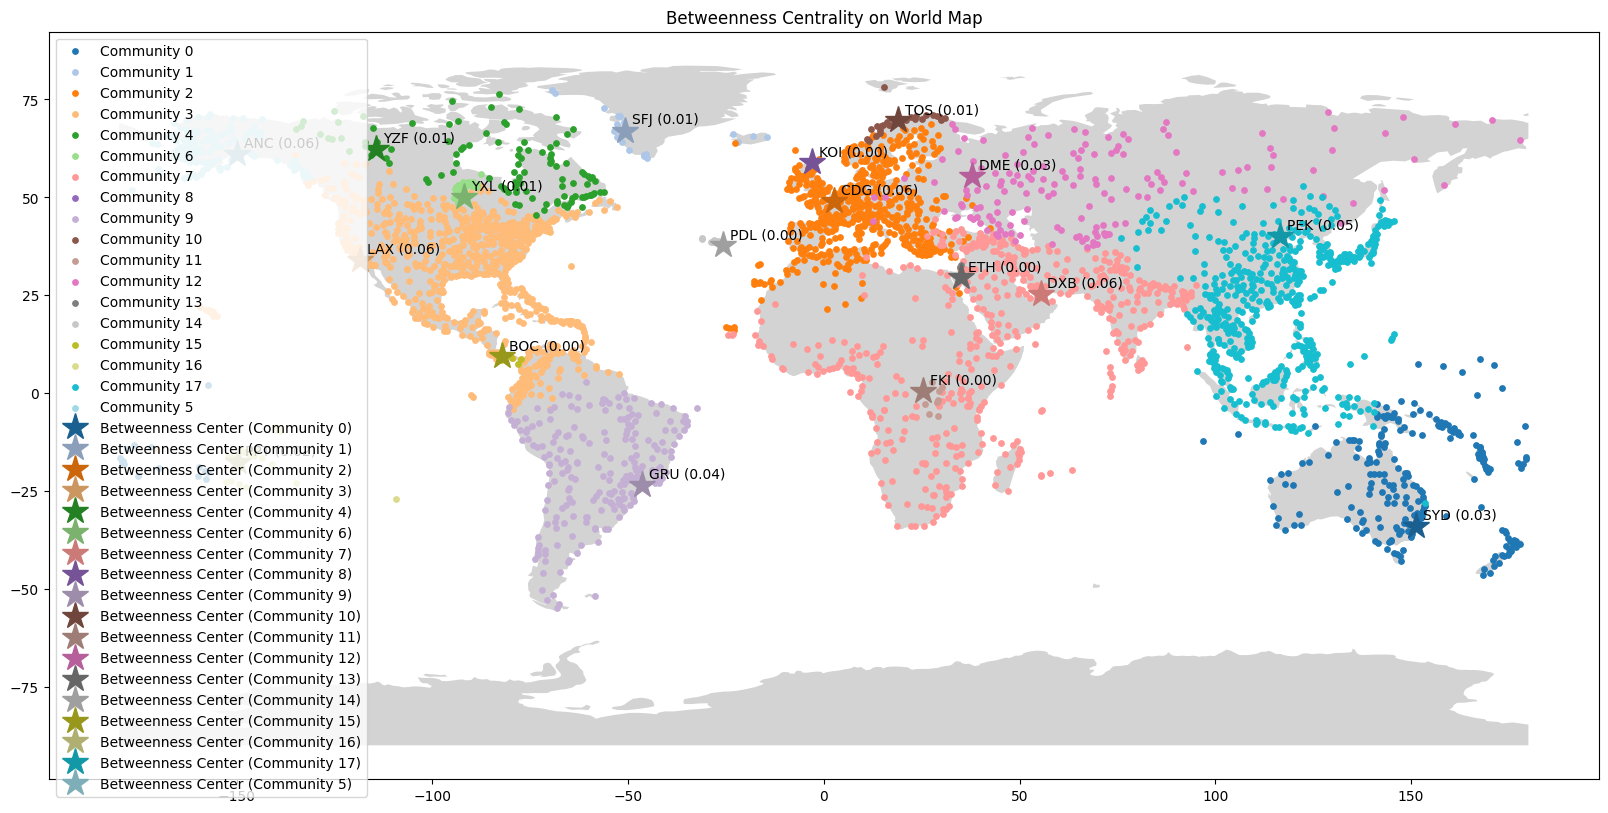

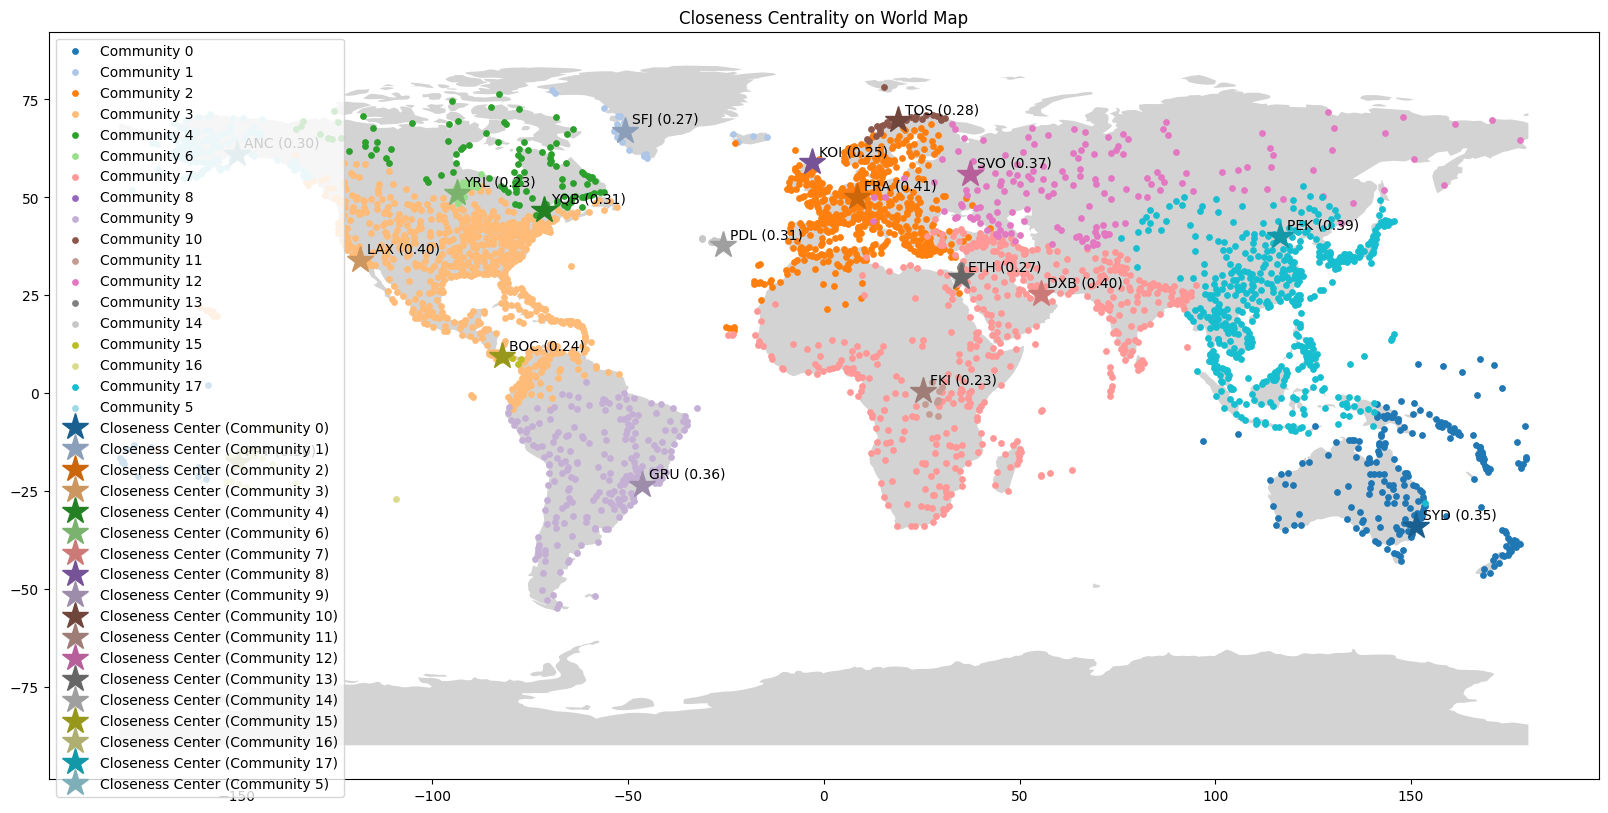

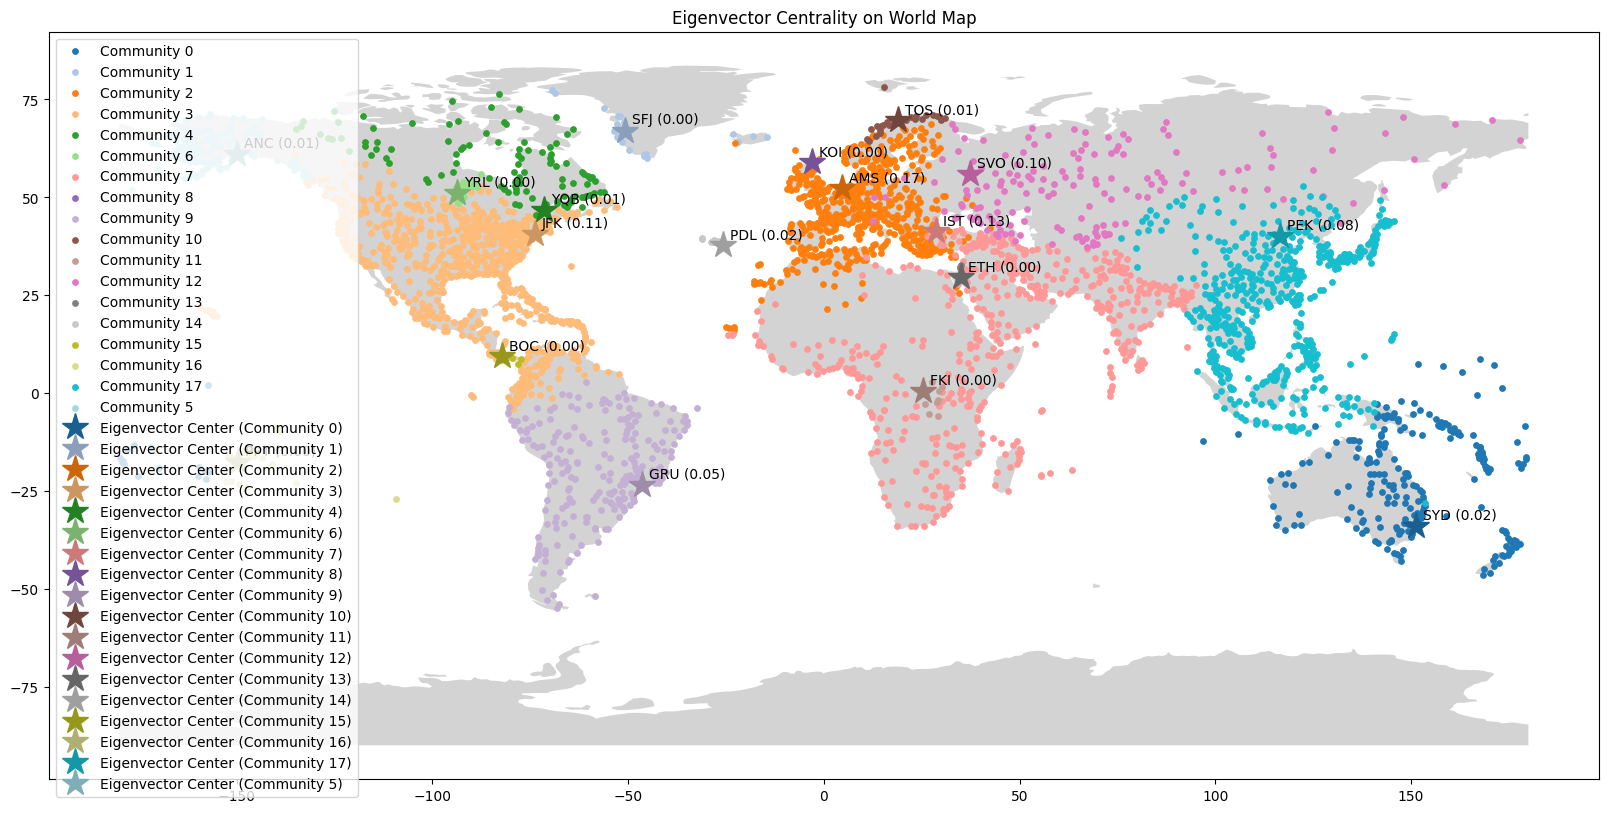

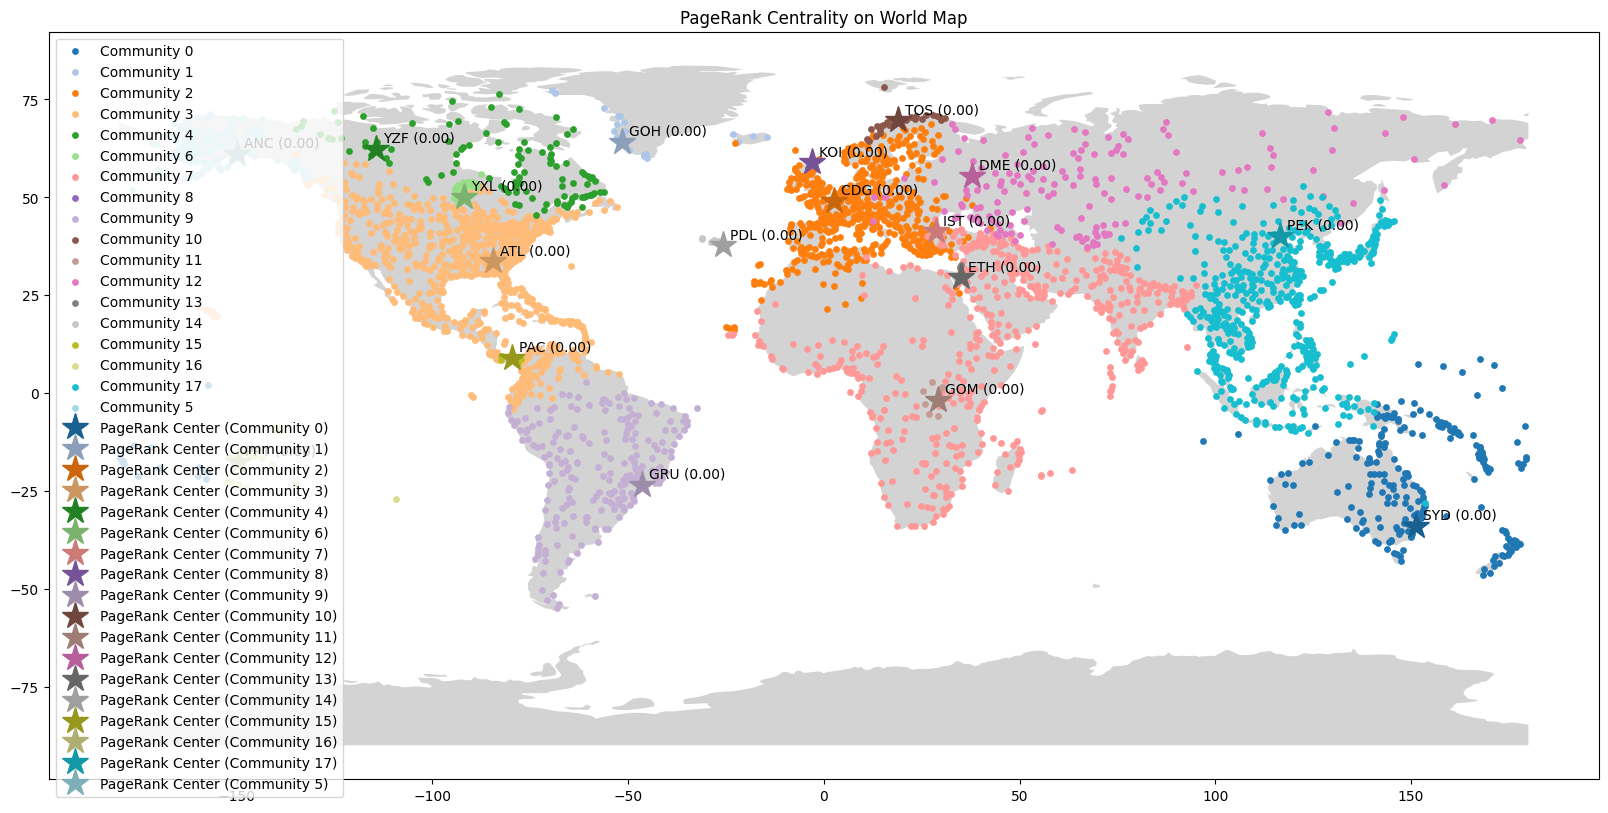

In [55]:
centrality_measures = {
    'Degree': degree_centrality,
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Eigenvector': eigenvector_centrality,
    'PageRank': pagerank
}

for centrality_name, centrality_data in centrality_measures.items():
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(20, 12))
    world.plot(ax=ax, color='lightgray')  # Plot world map in the background

    # Plot all nodes, colored by community
    for community, color in community_colors.items():
        subset = gdf[gdf['community'] == community]
        subset.plot(ax=ax, marker='o', color=color, markersize=15, label=f"Community {community}")

    # Find and plot the central node for each community based on the current centrality measure
    for community, color in community_colors.items():
        community_nodes = df[df['community'] == community].Node.tolist()
        max_centrality = 0
        central_node = None
        for node in community_nodes:
            if centrality_data[node] > max_centrality:
                max_centrality = centrality_data[node]
                central_node = node

        if central_node:
            central_node_data = df[df.Node == central_node]
            ax.plot(central_node_data['longitude'], central_node_data['latitude'],
                    marker='*', markersize=20, linestyle='None', color=darken_color(color),
                    label=f'{centrality_name} Center (Community {community})')
            ax.annotate(f'{central_node} ({max_centrality:.2f})',
                        (central_node_data['longitude'].iloc[0], central_node_data['latitude'].iloc[0]),
                        textcoords="offset points", xytext=(5,5), ha='left')


    # Add legend and show plot
    plt.legend()
    plt.title(f"{centrality_name} Centrality on World Map")
    plt.show()

In [58]:
# Implement clique percolation to detect overlapping communities

import networkx as nx

def clique_percolation_community_detection(graph, k):
    """
    Detects overlapping communities in a graph using clique percolation.

    Args:
      graph: The input graph (networkx.Graph).
      k: The size of the cliques to consider.

    Returns:
      A list of communities (sets of nodes).
    """
    cliques = list(nx.find_cliques(graph))
    cliques = [c for c in cliques if len(c) >= k]  # Filter cliques smaller than k

    communities = []
    used_cliques = set()

    for i in range(len(cliques)):
        if i not in used_cliques:
            community = set(cliques[i])
            used_cliques.add(i)
            queue = [i]

            while queue:
                current_clique_index = queue.pop(0)
                current_clique = set(cliques[current_clique_index])

                for j in range(len(cliques)):
                    if j not in used_cliques:
                        other_clique = set(cliques[j])
                        if len(current_clique.intersection(other_clique)) >= k - 1: #Overlap condition
                            community.update(other_clique)
                            used_cliques.add(j)
                            queue.append(j)
            communities.append(community)
    return communities

# Example usage (assuming 'G' is your graph):
k = 8  # Minimum clique size
overlapping_communities = clique_percolation_community_detection(G, k)

# Print or further process the detected communities
for i, community in enumerate(overlapping_communities):
    print(f"Community {i+1}: {community}")

Community 1: {'PSP', 'DLC', 'TXL', 'HRB', 'CCJ', 'BKI', 'TLL', 'DUS', 'ISB', 'CMH', 'BRU', 'MXP', 'BOS', 'ONT', 'OSL', 'AMM', 'TSA', 'RSW', 'BJX', 'LUX', 'WXN', 'LJU', 'NJF', 'JAX', 'ALG', 'SYD', 'LAS', 'KEF', 'OVB', 'BHY', 'XIY', 'LGW', 'ABJ', 'PNQ', 'FCO', 'OKA', 'TIF', 'KMQ', 'HPN', 'CCU', 'YNT', 'TSN', 'SYR', 'SYZ', 'BRN', 'LHW', 'RTM', 'SHJ', 'MDT', 'BRI', 'IAH', 'SOU', 'BUF', 'HYD', 'CGK', 'DUB', 'FNC', 'ORK', 'BOM', 'YIH', 'MTY', 'WAW', 'DBV', 'RUH', 'MGA', 'GRO', 'YHZ', 'AJA', 'CAN', 'LYG', 'DAY', 'TBZ', 'RTB', 'SAN', 'SJO', 'GVA', 'SXM', 'MYR', 'TPA', 'BRE', 'LEJ', 'TYS', 'IST', 'BSB', 'SJJ', 'PIT', 'PEN', 'DMK', 'OUA', 'PIA', 'CPH', 'RAK', 'MJT', 'BEY', 'AGP', 'SMI', 'KTM', 'SNA', 'EZE', 'DYG', 'GDN', 'BAV', 'GLA', 'KOA', 'ARN', 'GSP', 'DWC', 'LWO', 'LIR', 'HGH', 'GUA', 'NTE', 'CIH', 'TAO', 'KGS', 'JED', 'JJN', 'ABQ', 'GSO', 'MLI', 'ROA', 'PVR', 'VLC', 'CVG', 'CUN', 'MBJ', 'LJG', 'AGA', 'ELP', 'PEW', 'MHD', 'SAP', 'BMI', 'PRN', 'VIE', 'SXB', 'DKR', 'FRA', 'AES', 'HAK', 'ICN',

The results of clique percolation for community detection identify densely connected subgroups of nodes within a network, where each node shares significant relationships with others in its community. High-order methods, like clique percolation, focus on finding overlapping and modular structures by identifying k-cliques (complete subgraphs of size
𝑘
k), allowing nodes to belong to multiple communities. This reflects real-world complexity, such as individuals participating in multiple social groups. In contrast, low-order methods, such as modularity-based or partitioning algorithms (e.g., Louvain or spectral clustering), aim for global optimization by assigning nodes to a single community based on connection density. While low-order methods are computationally efficient and provide clear partitions, high-order methods are better suited for capturing overlapping relationships, making them particularly effective for systems like social networks or transportation systems where nodes naturally belong to multiple groups.

In [60]:
# Analyze community sizes
community_sizes = [len(community) for community in overlapping_communities]
print("Community sizes:", community_sizes)

# Analyze community composition
for i, community in enumerate(overlapping_communities):
    community_df = df[df['Node'].isin(community)]  # Subset of df for the current community
    print(f"\nCommunity {i+1} Analysis:")
    print("Number of nodes:", len(community_df))

    # Analyze countries represented in the community
    country_counts = community_df['country'].value_counts()
    print("Country distribution:")
    print(country_counts)

    # Other analyses can be performed here based on the community_df, e.g.,
    # - Average/median latitude/longitude
    # - Most frequent attributes (e.g., 'name', 'category')
    # - etc.

    #Example:  Calculate and print the average latitude and longitude for the community
    average_latitude = community_df['latitude'].mean()
    average_longitude = community_df['longitude'].mean()
    print(f"Average Latitude: {average_latitude}")
    print(f"Average Longitude: {average_longitude}")

# Further analysis can be done to identify significant patterns or outliers within the detected communities.

Community sizes: [570, 9, 8, 8, 8, 11, 8]

Community 1 Analysis:
Number of nodes: 570
Country distribution:
country
United States             118
China                      69
Spain                      20
Italy                      19
United Kingdom             19
                         ... 
Bosnia and Herzegovina      1
Malta                       1
Israel                      1
Czech Republic              1
Qatar                       1
Name: count, Length: 135, dtype: int64
Average Latitude: 33.12619037004393
Average Longitude: 7.713024073754285

Community 2 Analysis:
Number of nodes: 9
Country distribution:
country
Indonesia    7
Malaysia     1
Singapore    1
Name: count, dtype: int64
Average Latitude: -4.559244589702965
Average Longitude: 111.49674166087463

Community 3 Analysis:
Number of nodes: 8
Country distribution:
country
Benin            1
Cote d'Ivoire    1
Nigeria          1
Togo             1
Cameroon         1
Gabon            1
Morocco          1
France           1




The code performs community detection on a network of airports and their routes using several algorithms and visualizations. Let's break down the key parts and the expected output:

**1. Data Loading and Preprocessing:**

- Loads airport and route data from CSV files (`cleaned_airports.csv`, `cleaned_routes.csv`).  The code assumes these files are in the same directory as the notebook, or that the path is correctly set in `data_path`.
- It then merges the airport IATA codes with the route data, creating a more refined representation of connections based on IATA codes (airport identifiers).
- Displays the first few rows of each DataFrame for initial inspection.
- Creates a NetworkX graph `G`, adding airports as nodes and routes as edges.
- Prints the number of nodes and edges in the created graph.
- Iterates through the nodes of the graph and prints their attributes.
- Checks for connectivity: if the graph is not fully connected, it extracts the largest connected component to focus analysis.

**2. Louvain Community Detection:**

- Applies the Louvain algorithm (`community_louvain.best_partition(G)`) to find communities within the airport network.
- Assigns the identified community labels as attributes to each node in the graph.
- Visualizes the communities using a spring layout, with different colors representing different groups.

**3. Geographical Visualization:**

- Creates a GeoDataFrame (`gdf`) from the graph data, including geographical coordinates.
- Loads a world map using `geopandas` to create a visual background.
- Plots the airports on the world map, with each point colored according to its community.

**4. Edge Analysis:**

- Calculates and plots the number of edges within each community.
- Prints the number of edges per community to the console.

**5. Community Center Identification:**

- Calculates the geometric center of each community using the Convex Hull algorithm.
- Prints the longitude and latitude of each community's geometric center.
- Then uses several centrality measures (degree, betweenness, closeness, eigenvector, PageRank) to find the most central node within each community, presenting them as alternative "centers".

**6. Centrality Visualization:**

- Creates visualizations for each centrality measure showing the airports and their communities, highlighting the central nodes within each community with darker colors and annotations for more detail.

**7. Overlapping Community Detection (Clique Percolation):**

- Implements a Clique Percolation algorithm to find overlapping communities in the airport network, based on cliques (groups of interconnected nodes) of a specified size `k=8.
- The communities are printed.


**To Run the Code:**

1.  **Install Libraries:** Make sure you have all the required libraries installed (the code includes the installation commands).
2.  **Data Files:** Ensure `cleaned_airports.csv` and `cleaned_routes.csv` are in the same directory as the notebook, or update the `data_path` variable accordingly.
3.  **Execute:** Run all the code cells in the notebook.

